<h1>Определение перспективного тарифа для телеком компании</h1>

Мы - аналитики компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

*Тариф «Смарт»*

    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*

     - Ежемесячная плата: 1950 рублей
     - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
     - Стоимость услуг сверх тарифного пакета:
     * минута разговора: 1 рубль
     * сообщение: 1 рубль
     * 1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

**Описание данных:**

*Таблица users (информация о пользователях):*

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

*Таблица calls (информация о звонках):*

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

*Таблица messages (информация о сообщениях):*

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

*Таблица internet (информация об интернет-сессиях):*

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

*Таблица tariffs (информация о тарифах):* 

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) 

**План работы**: первым делом мы ознакомимся с полученными данными; далее мы подготовим наши таблицы к дальнейшей работе: разберемся с ошибками и добавим дополнительную информацию; затем проведем анализ данных, проверим гипотезы и, наконец, сделаем общий вывод.

<h3>Оглавление</h3>

1. [Шаг 1: Первичный обзор данных, получение общей информации о данных](#start)   
2. [Шаг 2: Подготовка данных](#prepare)   
    * [Предобработка данных: изменение типов данных и работа с ошибками](#preproc)   
    * [Добавление новой информации](#adding)     
3. [Шаг 3: Анализ данных](#analys)
4. [Шаг 4: Проверка гипотез](#hypo)
5. [Шаг 5: Общие выводы](#conc)

<h3> Шаг 1: Первичный обзор данных, получение общей информации о данных </h3>
<a id='start'></a>

Первым делом импортируем необходимые нам библиотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Сохраним датасеты в переменные, посмотрим общую информацию о них, а также взглянем на первые строки таблиц. Начнем с users.

In [2]:
users = pd.read_csv('/datasets/users.csv')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Таблица, как и соответствует заявленному, содержит 500 строк и 8 столбцов, один из которых (churn_date) содержит пропущенные значения в виде NaN'ов - показатели того, что на момент получения данных пользователь продолжал использовать тариф; типы данных столбцов churn_date и reg_name не соответствуют семантике полей - они должны иметь тип данных datetime, с этим мы разберемся позднее, забегая вперед, - эта проблема наблюдается во всех таблицах. В остальном - ничего необычного, пропущенные значения в неявном виде не замечены.

Теперь calls. 

In [5]:
calls = pd.read_csv('/datasets/calls.csv')

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В таблице calls у нас нет пропущенных значений в виде NaN'ов, об этом нас информирует результат работы метода info, но как видно из первых десяти строк датафрейма, в половине первых записей в столбце duration стоит значение 0.0. 

Посмотрим на messages. 

In [8]:
messages = pd.read_csv('/datasets/messages.csv')

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Здесь все в порядке, кроме типа данных поля с датой.

Ознакомимся с таблицей internet.

In [11]:
internet = pd.read_csv('/datasets/internet.csv')

In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


В этой таблице у нас появился столбец unnamed, значения которого дублируют индекс. Мы позже его удалим. 

И посмотрим на последнюю таблицу - tariffs.

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Ну, здесь у нас точно все хорошо.

**Выводы по Шагу 1**: итак, на данном шаге мы ознакомились с данными, предоставленными нам для работы. Для каждой из пяти таблиц мы вызвали методы info, чтобы просмотреть общую информацию, и head, для того, чтобы ознакомиться с первыми строками таблиц. Были выявлены сразу некоторые общие для всех датасетов проблемы - несоответствие типов данных полей с датой семантике вопроса. Были выявлены и некоторые индивидуальные особенности - столбец, дублирующий индекс, например. Но в общем, можно сказать: наши данные почти идеальны. 

<h3>Шаг 2: Подготовка данных </h3>
<a id='prepare'></a>

Наша работа на данном шаге будет проводиться в два этапа: сначала мы предобработаем данные - приведем их к нужным типам и рассмотрим поближе ошибки, которые упомянули при знакомстве с таблицами, затем - создадим новый датафрейм и заполним его информацией, которая потребуется нам для дальнейшего исследования.

<h3>Предобработка данных: изменение типов данных и работа с ошибками</h3>
<a id='preproc'></a>

Начнем с рассмотрения ошибок. 

В дальнейшем нам потребуется рассчитать выручку от пользователей тарифов. Для этого нам потребуются столбцы с датой, один из которых - churn_date из users, содержащий в себе пропущенные значения. Мы можем оставить все как есть, методы pandas позволят нам обработать значения данного столбца в любом случае - привести непропущенные значения к datetime. Но лучше, конечно, от них избавиться, особенно, учитывая то, что у нас есть, чем их заменить - мы знаем, что нам предоставлены данные за 2018 год, то есть формально - прекращение использования тарифа пользователем в 2018 году происходит 31 декабря 2018 года. Заменим пропущенные значения в данном столбце.

In [17]:
users = users.fillna({'churn_date' : '2018-12-31'})

Это, конечно, не ошибка, а значение, сигнализирующее об определенном положении вещей, о котором мы были предупреждены заранее. Но выделить этот момент - необходимо. Идем дальше. 

Очень интересная ситуация у нас в calls в столбце duration.Там присутствуют значения 0.0, кои вполне могут сигнализировать о звонках, где собеседник не взял трубку. Посчитаем их процентное соотношение к общему количеству записей.

In [18]:
str(round(calls.query('duration == 0').shape[0] / calls.shape[0] * 100, 2)) + '%'

'19.55%'

Почти 20 процентов - пятая часть таблицы. 

Давайте подумаем, на что повлияет удаление, или наоборот - игнорирование, такой крупной части таблицы и что мы можем сделать с этим.

Во-первых, при удалении при подсчете количества звонков изменится их количество для каждого пользователя и в целом. Рассмотрим этот пункт подробнее. Каждый пропущенный звонок - это потенциальный разговор, вопрос лишь в том - перезвонил ли user после или нет? Тут варианта два. Допустим, в половине случае пользователь решил перезвонить, тогда наши нулевые duration не имеют никакого смысла - это просто дубль звонка, а еще допустим, что не перезвонил - тогда этот звонок может расцениваться как потенциальная трата минут, как потенциальный самостоятельный звонок, который надо бы зафиксировать в величине 'количество звонков'. Но если взглянуть на план нашей дальнейшей работы, можно понять, что эта величина не так уж и сильно нас волнует - мы фокусируемся на количестве минут в данном исследовании, хоть в следующем пункте нам и предложено посчитать для каждого клиента количество звонков. По этому пункту нельзя дать точного ответа - удалять или оставлять. 

Во-вторых, при удалении данных записей медианное и среднее время звонка станут более корректными, фактическое значение будет соответствовать семантике вопроса - ведь учет пропущенных звонков в таких величинах не есть правильное действие. Плюсик в сторону удаления.

В-третьих, при удалении данных записей не изменятся сильно важные для нас величины: количество минут, израсходованных каждым пользователем за месяц и суммарно за год, но мы избавимся от строк, содержащих мало полезной информации, и будем точно уверены в нашем датафрейме.

Очевидно, мы можем удалить записи, в которых столбец duration содержит значение 0. Сделаем это.

In [19]:
calls = calls.drop(calls.query('duration == 0').index).reset_index(drop=True)

Раз у нас появились нулевые значения в звонках - результаты невзятых трубок, может быть, и в таблице с интернет-сессиями у нас есть нулевые значения. Этому можно было бы найти целый ряд объяснений: закончился трафик, пользователь передумал выходить в сеть. 

In [20]:
str(round(internet.query('mb_used == 0').shape[0] / internet.shape[0] * 100, 2)) + '%'

'13.12%'

Удивительно, но и в этой таблице имеются подобные записи. Размышляя точно так, как и в предыдущем случае, можно получить то же решение - удалить подобные строки. Сделаем это. 

In [21]:
internet = internet.drop(internet.query('mb_used == 0').index).reset_index(drop=True)

Перейдем к следующей проблеме. Вспомним, что в таблице internet у нас лишний столбец. Удалим его.

In [22]:
internet = internet.drop(columns=['Unnamed: 0'])

Данная ошибка выглядит как попытка добавить столбец с индексами вручную. Вероятно, так оно и было. Либо это попытка какого-то другого средства добавить индексы при сборе данных. 

Никаких других проблем при знакомстве с данными выявлено не было. Теперь поменяем типы данных некоторых столбцов, а именно - содержащих даты. Напишем функцию для этого.

In [23]:
def change(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')

In [24]:
change(users, 'churn_date')
change(users, 'reg_date')
change(calls, 'call_date')
change(messages, 'message_date')
change(internet, 'session_date')

Вызовем метод info к одному из датафреймов, чтобы посмотреть, все ли получилось.

In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Да, тип данных поменялся.

Обратим внимание, на примечание, которое нам оставили: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Что это для нас значит? Необходимо в таблицах округлить наши значения - чтобы, например, столбец, содержащий в себе продолжительность разговора, имел целочисленный тип данных - никаких секунд. Будем работать с duration из calls и mb_used из internet.

In [26]:
calls['duration'] = np.ceil(calls['duration']).astype('int64')

In [27]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int64')

Готово.

Вывод по подпункту: мы провели важную работу - привели наши данные в лучший вид, избавились от ошибок, пропущенных значений, а также сделали так, чтоб столбцы, содержащие даты, имели соответствующий тип данных и учли особенности компании, данные от которой мы исследуем. Можем идти дальше.

<h3>Добавление новой информации</h3>
<a id='adding'></a>

Так, здесь нам необходимо подсчитать для каждого пользователя: 

    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя.

Немного логики работы оператора: будем придерживаться версии о том, что абонентская плата списывается не первого числа каждого месяца, а в определенное число - в тот день, когда произошла регистрация, например, пользователь зарегистрировался 4 ноября, значит плату с него списывают каждое 4 число. Деньги в этот день списывают за следующий (!) месяц. Если пользователь прекратил использование тарифа до окончания пакета, то деньги ему не возвращают. Это соответствует объективной реальности, но делает наши вычисления сложнее. Эти факты дают нам сделать ряд выводов, имеющих непосредственное отношение к нашей дальнейшей работе: во-первых, нам надо будет выделить такой день X для каждого пользователя, хранить его где-то, во-вторых, получаем, что таких отрезков по месяцу у нас будет максимум 12 для каждого пользователя, а один из них - последний, с большой вероятностью будет неполным.

Создадим объект Series, в который поместим дни списания денежных средств для каждого пользователя; устройство таблицы users, из которой мы будем брать информацию для создания данного объекта, позволяет нам сказать, что i-тый индекс нашего Series содержит в себе информацию о дне платежа пользователя, информация о котором содержалась в i-той строке users,  а значит - его user_id это i+1000. Также создадим Series с месяцами, в которые пользователи прекращали использовать тариф. Это позволит нам затем убрать неполные месяцы.

In [28]:
users_days = users['reg_date'].dt.day
users_churn_month = users['churn_date'].dt.month

Создадим новый датафрейм для хранения наших новых, рассчитанных данных.  Нам потребуется столбец для user_id.

In [29]:
users_used = pd.DataFrame()
users_used['user_id'] = users['user_id']

Еще немного логики работы оператора: будем рассматривать месяцы как почти календарные, будто, начало месяца смещается с 1 числа на X число - день списания денежных средств и обновления тарифа. Например: у А. день списания средств 6 число, потому что он подключился к тарифу 6 марта, звонок А. от 8 апреля - это звонок, который соответствует месяцу 4 (примерно, апрель), а вот звонок от 3 апреля - месяцу 3 - марту, поскольку на этот момент день X - день списания средств, день 'начала нового месяца', еще не наступил. 

Создадим функцию для вышеописанного действия - определения по дате сообщения/звонка/сессии, к какому отрезку-месяцу относятся перечисленные. 

In [30]:
def definer(date, pay_day):
    if date.day < pay_day: 
        month = date.month - 1
    else: 
        month = date.month
    return month

Далее наша задача - используя данную функцию, определить к какому месяцу относится сообщение/звонок/сессия. Для этого в каждой из соответствующих таблиц создадим отдельный столбец. Затем сможем удобно группировать наши датафреймы. 

In [31]:
def cat(row, column_name):
    pay_day = users_days[row['user_id'] - 1000]
    date = row[column_name]
    return definer(date, pay_day)
def adder(data, column_name):
    data['cat'] = data.apply(cat, args=(column_name,), axis=1)

In [32]:
adder(calls, 'call_date')
adder(messages, 'message_date')
adder(internet, 'session_date')

Итак, мы добавили столбцы во все таблицы. Можем группировать, а затем сводить в общую таблицу.

In [33]:
users_used = users_used.merge(calls.pivot_table(
    index='user_id', columns='cat', values='duration', aggfunc=['sum', 'count']
), how='outer', on='user_id')
users_used = users_used.merge(messages.pivot_table(
    index='user_id', columns='cat', values='id', aggfunc='count'
), how='outer', on='user_id')
users_used = users_used.merge(internet.pivot_table(
    index='user_id', columns='cat', values='mb_used', aggfunc='sum'
), how='outer', on='user_id')

C:\Users\Acer\anaconda3\envs\practicum\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Вызовем метод info, чтобы быть в курсе событий. 

In [34]:
users_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 49 columns):
user_id        500 non-null int64
(sum, 1)       43 non-null float64
(sum, 2)       82 non-null float64
(sum, 3)       114 non-null float64
(sum, 4)       166 non-null float64
(sum, 5)       205 non-null float64
(sum, 6)       245 non-null float64
(sum, 7)       288 non-null float64
(sum, 8)       336 non-null float64
(sum, 9)       368 non-null float64
(sum, 10)      406 non-null float64
(sum, 11)      441 non-null float64
(sum, 12)      463 non-null float64
(count, 1)     43 non-null float64
(count, 2)     82 non-null float64
(count, 3)     114 non-null float64
(count, 4)     166 non-null float64
(count, 5)     205 non-null float64
(count, 6)     245 non-null float64
(count, 7)     288 non-null float64
(count, 8)     336 non-null float64
(count, 9)     368 non-null float64
(count, 10)    406 non-null float64
(count, 11)    441 non-null float64
(count, 12)    463 non-null float64
1

Нам необходимо поменять названия столбцов,типы данных, заполнить пропуски и пересчитать мегабайты в гигабайты. Начнем с последнего. Помним, что результат  слияния сводной таблицы с результатом группировки таблицы internet - крайние 12 столбцов. При пересчете округляем до целого: пользователь либо покупает гигабайт, либо нет.

In [35]:
def mgtogb(amount):
    return np.ceil(amount/1024)
for i in range(1,13):
    column_name = str(i) + '_y'
    users_used[column_name] = users_used[column_name].apply(mgtogb)

Проведем остальные манипуляции с таблицей.

In [36]:
users_used.fillna(0, inplace=True)

In [37]:
name_list = ['user_id']
name_suf = ['calls_sum_','calls_count_', 'messages_count_','internet_sum_']
for i in name_suf:
    for j in range(1,13):
        name_list.append(i + str(j))
users_used.set_axis(name_list, axis='columns', inplace=True)

In [38]:
for i in name_list[1:]: 
    users_used[i] = users_used[i].astype('int64')

In [39]:
users_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 49 columns):
user_id              500 non-null int64
calls_sum_1          500 non-null int64
calls_sum_2          500 non-null int64
calls_sum_3          500 non-null int64
calls_sum_4          500 non-null int64
calls_sum_5          500 non-null int64
calls_sum_6          500 non-null int64
calls_sum_7          500 non-null int64
calls_sum_8          500 non-null int64
calls_sum_9          500 non-null int64
calls_sum_10         500 non-null int64
calls_sum_11         500 non-null int64
calls_sum_12         500 non-null int64
calls_count_1        500 non-null int64
calls_count_2        500 non-null int64
calls_count_3        500 non-null int64
calls_count_4        500 non-null int64
calls_count_5        500 non-null int64
calls_count_6        500 non-null int64
calls_count_7        500 non-null int64
calls_count_8        500 non-null int64
calls_count_9        500 non-null int64
calls_count_10 

Сейчас мы можем заняться подсчет помесячной прибыли с каждого пользователя. Но перед этим нам надо разобраться с последними месяцами. Итак, для каждого пользователя в нашей системе расчета платы есть неполный месяц (в большинстве случаев, конечно): либо это завершение использования тарифа ранее, чем кончается пакет и наступает день платы за новый месяца, либо конец года. Для каждого пользователя приравняем к нулю информацию об его опыте использовании тарифа в последний месяц. Затем проверим, имеет ли смысл держать в таблице поля про 12 месяц, и, если что, удалим их.

In [40]:
for i in range(1000, 1500):
    churn_m = users_churn_month[i-1000]
    for name in name_suf:
        c = name + str(churn_m)
        users_used.loc[i-1000, c] = 0

In [41]:
users_used['calls_sum_12'].unique()

array([0], dtype=int64)

In [42]:
users_used['internet_sum_12'].unique()

array([0], dtype=int64)

In [43]:
users_used['messages_count_12'].unique()

array([0], dtype=int64)

Очевидно, поля, содержащие информацию о 12 месяце, можно удалить.

In [44]:
columns = []
for i in name_suf:
    columns.append(i + str(12))
users_used = users_used.drop(columns=columns)

Займемся подсчетом прибыли.

In [45]:
def revenue(row, month):
    total = 0
    calls = row['calls_sum_' + str(month)]
    messages = row['messages_count_' + str(month)]
    internet = row['internet_sum_' + str(month)]
    user_id = row['user_id']
    tariff = users.query('user_id == @user_id')['tariff']
    tariff = tariff.loc[user_id - 1000]
    if calls == 0 and messages == 0 and internet == 0: 
        return 0
    if tariff == 'smart':
        i = 0
    else:
        i = 1
    if tariffs.loc[i, 'minutes_included'] < calls: 
        total += (calls - tariffs.loc[i,'minutes_included']) * tariffs.loc[i,'rub_per_minute']
    if tariffs.loc[i, 'messages_included'] < messages: 
        total += (messages - tariffs.loc[i, 'messages_included']) * tariffs.loc[i, 'rub_per_message']
    if tariffs.loc[i, 'mb_per_month_included'] < internet:
        total += (internet - tariffs.loc[i, 'mb_per_month_included']) * tariffs.loc[i,'rub_per_gb']
    total+= tariffs.loc[i, 'rub_monthly_fee']
    return total

In [46]:
for i in range(1,12):
    column_name = 'rev_' + str(i)
    users_used[column_name] = users_used.apply(revenue, axis=1, args=(i,))

Теперь у нас есть столбцы, содержащие необходимую информацию.

Вывод по подпункту: итак, на данном этапе мы создали новый датафрейм и добавили в него очень важную информацию.

**Вывод по Шагу 2**: на данном шаге мы занимались подготовкой данных, а именно, поработали с ошибками в таблицах, которые нам были предоставлены, поменяли типых данных некоторых столбцов; корректное содержимое исходных датафреймов позволило нам перейти на следующий пункт: мы собрали все самое важное из наших пяти таблиц  и соединили это в новый объект, на основе которого мы будем делать ключевые для исследования выводы. 

<h3>Шаг 3: Анализ данных </h3>
<a id='analys'></a>

Итак, на данном Шаге нам необходимо описать поведение клиентов оператора: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Требуется посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы, описать распределения.

План работы такой: посчитаем среднее количество минут, сообщений и объема интернет-трафика для каждого пользователя; произведем финальные вычисления и построения графиков; сделаем выводы. 

Для средних показателей пользователей создадим отдельный датафрейм.Заполним его. Сейчас, когда мы вычислили финансовую часть вопроса для каждого пользователя - выручку, можем переходить от целых значений обратно к дробным. При округлении мы теряем в точности. 

In [47]:
users_used_mean = pd.DataFrame()

In [48]:
users_used_mean['user_id'] = users_used['user_id']

In [49]:
def meaner(row, factor_pref):
    mean = 0
    months = 0
    for i in range(1,12):
        if row[factor_pref + str(i)] == 0:
            continue
        else:
            mean += row[factor_pref + str(i)]
            months += 1
    if months == 0: 
        return 0
    return round(mean/months,2)

In [50]:
users_used_mean['calls_sum_'] = users_used.apply(meaner, args=('calls_sum_', ), axis=1)
users_used_mean['messages_count_'] = users_used.apply(meaner, args=('messages_count_',), axis=1)
users_used_mean['internet_sum_'] = users_used.apply(meaner, args=('internet_sum_',), axis=1)

Добавим также столбец с тарифами для удобства, затем посмотрим информацию о нашей новой таблице и ее первые 10 строк.

In [51]:
users_used_mean['tariff'] = users['tariff']
users_used_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
user_id            500 non-null int64
calls_sum_         500 non-null float64
messages_count_    500 non-null float64
internet_sum_      500 non-null float64
tariff             500 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 23.4+ KB


In [52]:
users_used_mean.head(10)

,user_id,calls_sum_,messages_count_,internet_sum_,tariff
0,1000,359.57,69.00,15.29,ultra
1,1001,430.00,0.00,19.00,smart
2,1002,236.50,11.00,17.67,smart
3,1003,879.25,85.75,13.00,ultra
4,1004,124.86,158.29,19.71,ultra
5,1005,590.00,48.91,9.09,smart
6,1006,343.30,0.00,16.40,smart
7,1007,523.00,26.88,16.00,smart
8,1008,0.00,0.00,0.00,smart
9,1009,233.00,12.11,19.00,smart


Создадим новый датафрейм для хранения характеристик: среднего значения, дисперсии и стандартного квадратичного отклоления для каждого тарифа. Посчитаем все вышеперечисленное для каждого тарифа. Напишем функцию для этого.

Также обезопасим себя от граничных случаев. Не совсем корректно учитывать информацию о пользователях которые вообще не звонят, не пишут сообщения и не используют интернет (и даже, например, в таких случаях имеют кнопочный телефон). Это как в анекдоте про Билла Гейтса и бар. 

In [53]:
users_used_char = pd.DataFrame(columns=['tariff'], data = [
    ['smart'], ['ultra'], ['smart-0'], ['ultra-0']
])

In [54]:
def filler(medium_data, result_data, factor_pref):
    smart = medium_data.query('tariff == "smart"')
    ultra =  medium_data.query('tariff == "ultra"')
    smart1 = medium_data[(medium_data['tariff'] == "smart") & (medium_data[factor_pref] != 0)]
    ultra1 = medium_data[(medium_data['tariff'] == "ultra") & (medium_data[factor_pref] != 0)] 
    tarif_plan = [smart, ultra, smart1, ultra1]
    mean_list = []
    var_list = []
    std_list = []
    for i in tarif_plan: 
        mean_list.append(round(i[factor_pref].mean(), 2))
        var_list.append(round(np.var(i[factor_pref],ddof=1),2))
        std_list.append(round(np.std(i[factor_pref],ddof=1),2))
    result_data[factor_pref + 'mean'] = mean_list
    result_data[factor_pref + 'var'] = var_list
    result_data[factor_pref + 'std'] = std_list

In [55]:
for i in ['calls_sum_', 'messages_count_', 'internet_sum_']:
    filler(users_used_mean, users_used_char, i)

Посмотрим, что у нас получилось.

In [56]:
users_used_char

,tariff,calls_sum_mean,calls_sum_var,calls_sum_std,messages_count_mean,messages_count_var,messages_count_std,internet_sum_mean,internet_sum_var,internet_sum_std
0,smart,429.04,44539.11,211.04,32.94,858.29,29.30,16.61,41.47,6.44
1,ultra,547.21,112602.81,335.56,55.73,2593.62,50.93,20.37,105.82,10.29
2,smart-0,467.68,30435.10,174.46,41.44,727.09,26.96,18.05,18.99,4.36
3,ultra-0,599.51,91855.42,303.08,70.37,2241.63,47.35,21.67,84.09,9.17


Данная таблица пригодится нам в дальнейшем, но по ней самой мы тоже можем сделать ряд выводов.

Во-первых, обратим внимание на разницу между статистиками, полученными по всему срезу, и теми, что считались без учета нулевых значений. У нас, безусловно, поменялись средние значения - выросли, но что более важно - уменьшились дисперсии и с.к.о. - данные имеют меньший разброс. Расмотрим более подробно крайние две строки.

Начнем с количества минут. Что мы видим? Опишем статистики по тарифу 'Смарт'. Среднее значение, полученное нами, не вызывает вопросов - предоставлено пользователю 500 минут, он, в среднем, расходует 468. Стандартное квадратичное отклонение весьма большое. Это сообщает нам о широком разбросе значений. Что со вторым тарифом? Среднее больше среднего предыдущего тарифа всего на 132 минуты, это при том, что 'Смарт' предоставляет пользователю 500 минут, а 'Ультра' - 3000. Интересно. С.к.о. по данным о пользователях этого тарифа тоже выше, что свидетельствует об еще большем разбросе данных, но это вполне объясняется разницей в количестве предоставляемых минут. 

Посмотрим на количество сообщений. Среднее количество по тарифу 'Смарт' 41 сообщение, по 'Ультра' - 70, при том, что по первому предоставляют - 50 штук, а по второму  - 1000. Зачем же пользователи регистрируются на этот тариф? С.к.о. большое для обоих величин. Так, пользователи тарифа 'Ультра', использующие и 23 сообщения в месяц в среднем, и 117 - оба остаются в пределах одной(!) сигма. 

Остался интернет. Средние не сильно отличаются: 18.1 гб и 21.7 гб, при предоставляемых 15 гб и 30 гб соответственно. Среднее квадратичное отклонение по тарифу 'Смарт' в этом вопросе не такое большое - всего 4.36 гб, а вот у тарифа 'Ультра' опять большой разброс - аж 9.27 гб. 

Какие общие выводы можно сделать по этой таблице на данном этапе работы? Образ пользователя тарифа 'Смарт' определен сильно лучше - меньшие разбросы по характеристикам, полученные средние значения соответствуют тем числам, которые фигурируют в описании тарифа: можно слегка грубо определить типичного зарегистрированного и понять логику его решений. Куда больше вопросов по среднему пользователю тарифа 'Ультра': большие разбросы - абсолютно разные идейно люди и разные цели подключения, сильно низкие средние значения, не соответствующие объемам, которые предоставляет компания - также поэтому сложно уловить причину регистрации на тариф.  

Сделаем важную пометку.

In [57]:
str(round(users.query('tariff == "ultra"')['tariff'].count() / 500 * 100,2)) + "%"

'29.8%'

In [58]:
users.query('tariff == "ultra"')['tariff'].count()

149

Информации о пользователях тарифа 'Ультра' у нас меньше, поскольку самих таких пользователей в выборке меньше, это может влиять на точность полученных значений.

Перейдем к гистограммам и распределениям. Построим 6 гистограмм: среднее количество сообщений, минут и объем интернет-трафика пользователей каждого тарифа отдельно. 

Будем также строить график нормального распределения одновременно с гистограммой. Матожидание распределения - среднее параметра, с.к.о. - с.к.о. параметра. Использовать будем срез, не содержащий нулевых значений. Напишем функцию для построения графиков.

Посмотроим гистограмму среднего количества минут в месяц пользователей тарифа 'Смарт'.

In [59]:
def normi_tarif(data, factor, tarif, bins, title, xlabel):
    data[(data['tariff'] == tarif) & (
    data[factor] != 0)].plot(kind='hist', density=True, y=factor, bins=bins, grid=True, 
                                       label = ' ')
    if tarif == 'smart':
        i = 2
    else:
        i = 3
    mo = users_used_char.loc[i, factor + 'mean']
    s = users_used_char.loc[i, factor + 'std']
    norm = st.norm.pdf(range(0, int(data[data['tariff'] == tarif][factor].max())), mo, s)
    plt.plot(norm)
    plt.title(title)
    plt.xlabel(xlabel)
    ylabel = 'Плотность частоты'
    plt.ylabel(ylabel)
    plt.show()

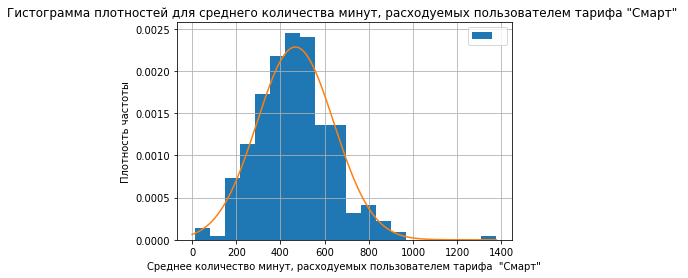

In [60]:
normi_tarif(users_used_mean, 'calls_sum_', 'smart', 20,
            'Гистограмма плотностей для среднего количества минут, расходуемых пользователем тарифа "Смарт" ',
            'Среднее количество минут, расходуемых пользователем тарифа  "Смарт"')

Итак, по полученной диаграмме видно - среднее количество минут, расходуемых пользователем тарифа 'Смарт' распределено нормально. Важно - наше среднее посчитано корректно.

Посмотрим для тарифа 'Ультра'.

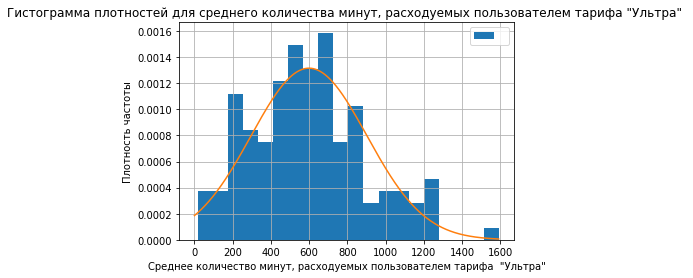

In [61]:
normi_tarif(users_used_mean, 'calls_sum_', 'ultra', 20,
           'Гистограмма плотностей для среднего количества минут, расходуемых пользователем тарифа "Ультра" ',
           'Среднее количество минут, расходуемых пользователем тарифа  "Ультра"')

Данная гистограмма уже не так красиво ложится под нормальное распределение, как предыдущая, но очертания её таки позволяют нам сказать, что эти данные распределены нормально. И не будем забывать, что пользователей  с таким тарифом у нас не так много, что тоже влияет, конечно.

Построим гистограмму среднего количества сообщений в месяц пользователей тарифа 'Смарт'.

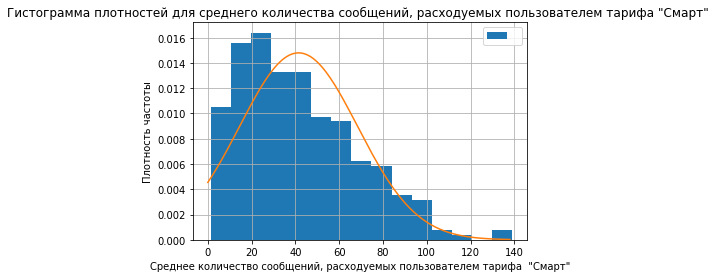

In [62]:
normi_tarif(users_used_mean, 'messages_count_', 'smart', 15, 
           'Гистограмма плотностей для среднего количества сообщений, расходуемых пользователем тарифа "Смарт" ',
           'Среднее количество сообщений, расходуемых пользователем тарифа  "Смарт"')

Наш график нормального распределения как будто правее, чем нужно, и слегка ниже. Ориентируясь по гистограмме, можно сказать, что данные распределены нормально, но судя по тому, как расположился график нормального распределения (которому мы в качестве мат.ожидания передали значение среднего по пользователям с таким тарифом), у нас не совпадают среднее по выборке и мат.ожидание фактического распределения - оно меньше. Это объясняется достаточно сильной скошенностью датасета, но самого важного факта не меняет - данные распределены нормально.

Посмотрим для тарифа 'Ультра'.

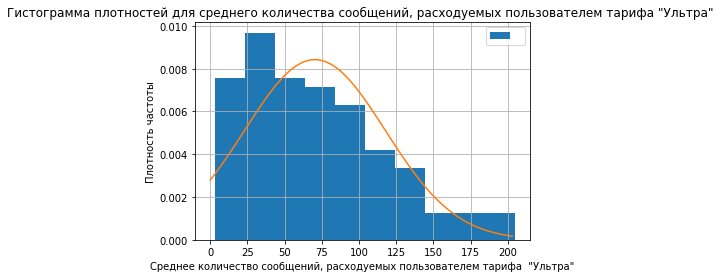

In [63]:
normi_tarif(users_used_mean, 'messages_count_', 'ultra', 10, 
           'Гистограмма плотностей для среднего количества сообщений, расходуемых пользователем тарифа "Ультра" ',
           'Среднее количество сообщений, расходуемых пользователем тарифа  "Ультра"')

Ситуация аналогичная прошлой - график норм. распределения как будто правее и ниже, чем нужно. Но приближенно таки можно сказать, что данные распределены нормально. Хотя при меньшем количестве корзин такого явного визуального соответствия нет, но это можно объяснить, во-первых, в принципе небольшой длиной оси абсцисс, и во-вторых, небольшим размером выборки (мы еще не учитываем пользователей, для которых параметр равен 0).

Построим гистограмму среднего объема интернет-трафика в месяц пользователей тарифа 'Смарт'.

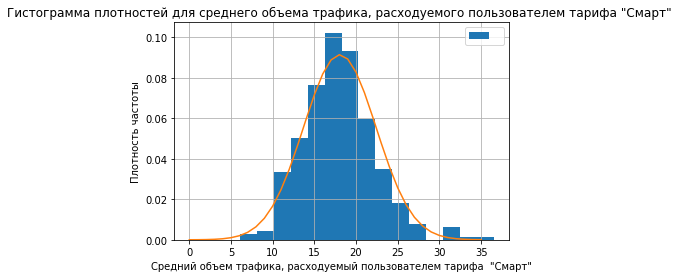

In [64]:
normi_tarif(users_used_mean, 'internet_sum_', 'smart', 15, 
           'Гистограмма плотностей для среднего объема трафика, расходуемого пользователем тарифа "Смарт" ',
           'Средний объем трафика, расходуемый пользователем тарифа  "Смарт"')

Очевидно, распределение нормальное. Строим для второго тарифа.

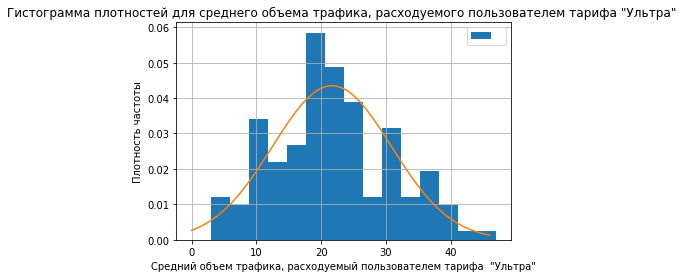

In [65]:
normi_tarif(users_used_mean, 'internet_sum_', 'ultra', 15, 
           'Гистограмма плотностей для среднего объема трафика, расходуемого пользователем тарифа "Ультра" ',
           'Средний объем трафика, расходуемый пользователем тарифа  "Ультра"')

Приближенно, ситуация идентичная - распределение нормальное.

В качестве заключительного слова по данному Шагу ответим на вопрос: 'Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?'. 

Напишем фунцию для получения ответа на вопрос.

Вспомним, что при нормальном распределении величины, вероятность попасть на любую точку графика ровно до мат. ожидания равно 0.5, ровно как и в любую точку после. Также факт - вероятность попадания в интервал [мат.ожидание; мат.ожидание + 2 сигма] равна 0.48. Таким образом, обозначив в качестве ответа на наш вопрос интервал [0;мат.ожидание + 2 сигма] мы предоставляем значения, про которые можно сказать: с вероятностью 0.98 они удовлетворяют реальную потребность пользователя тарифа, количество необходимого ему ресурса попадет в этот интервал, аналогично для интервала [0;мат.ожидание + 1 сигма] - вероятность в этом случае равна 0.84.

In [66]:
def conclusion(data, tarif, factor_pattern):
    answer = 'В среднем пользователю требуется: '
    if tarif == 'smart':
        j = 2
    else:
        j = 3
    mo = data.loc[j, factor_pattern[0] + 'mean']
    s = data.loc[j, factor_pattern[0] + 'std']
    answer += str (np.ceil(mo)) + factor_pattern[1] + '\n'
    answer += 'Чтобы удовлетворить потребность 98 процентов пользователей требуется : '
    higher_b = np.ceil(mo + 2 * s) 
    answer += str(higher_b) + factor_pattern[1] + '\n'
    answer += 'Чтобы удовлетворить потребность 84 процентов пользователей требуется: '
    med_b = np.ceil(mo + s)
    answer += str(med_b) + factor_pattern[1]
    return answer

Итак, для пользователя тарифа 'Смарт':

In [67]:
for i in [['calls_sum_', ' минут.'], ['messages_count_', ' сообщений.'], ['internet_sum_', ' гб интернет-трафика.']]:
    print(conclusion(users_used_char, 'smart', i))

В среднем пользователю требуется: 468.0 минут.
Чтобы удовлетворить потребность 98 процентов пользователей требуется : 817.0 минут.
Чтобы удовлетворить потребность 84 процентов пользователей требуется: 643.0 минут.
В среднем пользователю требуется: 42.0 сообщений.
Чтобы удовлетворить потребность 98 процентов пользователей требуется : 96.0 сообщений.
Чтобы удовлетворить потребность 84 процентов пользователей требуется: 69.0 сообщений.
В среднем пользователю требуется: 19.0 гб интернет-трафика.
Чтобы удовлетворить потребность 98 процентов пользователей требуется : 27.0 гб интернет-трафика.
Чтобы удовлетворить потребность 84 процентов пользователей требуется: 23.0 гб интернет-трафика.


Итак, в среднем пользователям тарифа хватает количества минут и сообщений, предоставляемых компанией, но объема интернет-трафика  - нет; а вот для удовлетворения подавляющего большинства пользователей нужно увеличить количество предоставляемых минут, сообщений и, естественно, объем трафика.

Посмотрим для тарифа 'Ультра'.

In [68]:
for i in [['calls_sum_', ' минут.'], ['messages_count_', ' сообщений.'], ['internet_sum_', ' гб интернет-трафика.']]:
    print(conclusion(users_used_char, 'ultra', i))

В среднем пользователю требуется: 600.0 минут.
Чтобы удовлетворить потребность 98 процентов пользователей требуется : 1206.0 минут.
Чтобы удовлетворить потребность 84 процентов пользователей требуется: 903.0 минут.
В среднем пользователю требуется: 71.0 сообщений.
Чтобы удовлетворить потребность 98 процентов пользователей требуется : 166.0 сообщений.
Чтобы удовлетворить потребность 84 процентов пользователей требуется: 118.0 сообщений.
В среднем пользователю требуется: 22.0 гб интернет-трафика.
Чтобы удовлетворить потребность 98 процентов пользователей требуется : 41.0 гб интернет-трафика.
Чтобы удовлетворить потребность 84 процентов пользователей требуется: 31.0 гб интернет-трафика.


В среднем пользователям тарифа хватает и количества минут, и сообщений (причем с большим избытком), и объема интернет-трафика. Также предоставляемых объемов хватает и для удовлетворения подавляющего большиства (опять же - с большим избытком), но есть исключение - интернет-трафик.

**Выводы по Шагу 3**: итак, на данном этапе мы проделали большой объем работы - описали поведение клиентов оператора: посчитали среднее количество звонков, смс и объема интернет-трафика для каждого пользователя; по полученным значениям вычислили средние по звонкам, смс и трафику для каждого тарифа, а также дисперсию и с.к.о. Это позволило нам рассмотреть интересные особенности в образе типичных пользователей тарифов. Также мы построили гистограммы по каждому фактору для обоих тарифов и убедились в нормальном распределении величин, а на основании этого уже смогли дать ответ на ключевой вопрос - сколько и чего требуется пользователям каждого из тарифов.

<h3> Шаг 4: Проверка гипотез </h3>
<a id='hypo'></a>

На данном Шаге необходимо проверить две гипотезы: 1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Итак, начнем с первой гипотезы. Нам нужно сравнить средние выручки от пользователей двух тарифов. Для этого нам надо посчитать их и занести в наш датафрейм, хранящий в себе средние - users_used_mean.

In [69]:
users_used_mean['rev_'] = users_used.apply(meaner, args=('rev_', ), axis=1)

Мы будем проверять данную гипотезу как гипотезу о равенстве средних двух генеральных совокупностей. 

Представим, что у нас две генеральные совокупности - средние выручки пользователей тарифа 'Смарт' и средние выручки пользователей тарифа 'Ультра'. Соответственно и выборок у нас две - в контексте задачи это срезы датафрейма со средними значениями по каждому тарифу. 

Сформулируем нулевую гипотезу: средние этих двух генеральных совокупностей равны. Сформулируем альтернативную гипотезу: средние этих двух генеральных совокупностей различаются.

Критический уровень статистической значимости возьмем 0.05.

Дисперсию совокупностей будем считать разной, поскольку, как было показано выше, многим пользователям тарифа 'Смарт' не хватает содержимого пакета и они докупают минуты, сообщения и гигабайты; в это же время большинство пользователей тарифа 'Ультра' удовлетворено, и типичный клиент 'Ультра', соответственно, платит лишь за стоимость самого тарифа.

Удостоверимся в этом с помощью теста Левена на равенство дисперсий.

In [70]:
st.levene(users_used_mean.query('tariff == "smart"')['rev_'], 
          users_used_mean.query('tariff == "ultra"')['rev_']).pvalue

0.0009878234427602235

По результату теста очевидно, что дисперсии разные - поскольку уровень статистической значимости очень мал. 

Проведем тест и посмотрим на p-value. Сравним с критическим уровнем статистической значимости.

In [71]:
results = st.ttest_ind(users_used_mean.query('tariff == "smart"')['rev_'], 
                      users_used_mean.query('tariff == "ultra"')['rev_'], 
                      equal_var = False )
alpha = .05

In [72]:
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается -> Средние не равны')
else: 
    print('Нулевая гипотеза не отвергается')

Нулевая гипотеза отвергается -> Средние не равны


Уровень статистической значимости результата теста ниже критического уровня статистической значимости, значит, что при принятии нулевой гипотезы о равенстве средних совокупности верной, иметь те выборки, что мы имеем, весьма меловероятно, соответственно, мы можем отвергнуть нулевую гипотезу и в качестве вывода сообщить: средние совокупностей не равны -> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Приступим ко второй гипотезе. Первым делом, добавим в наш датасет средних значений по пользователям users_used_mean столбец с городами пользователей для более удобной работы.

In [73]:
users_used_mean['city'] = users['city']

Как и в предыдущем случае, будем проверять данную гипотезу как гипотезу о равенстве средних двух генеральных совокупностей.

Представим, что у нас две генеральных совокупности: одна содержит информацию о средней выручке пользователей из Москвы, а вторая - информацию о средней выручке пользователей из регионов. Соответственно, выборки у нас тоже две - в контексте: срез по city = Москва и срез по city != Москва. 

Сформулируем нулевую гипотезу: средние этих генеральных совокупностей равны. Сформулируем альтернативную гипотезу: средние этих генеральных совокупностей не равны.

Критический уровень статистической значимости 0.05. 

Дисперсию совокупностей будем считать одинаковой, так как у нас нет оснований полагать, что они отличаются.

Проведем тест и посмотрим на p-value. Сравним с критическим уровнем статистической значимости.

In [74]:
results = st.ttest_ind(users_used_mean.query('city == "Москва"')['rev_'], 
                      users_used_mean.query('city != "Москва"')['rev_'])
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается -> Средние не равны')
else: 
    print('Нулевая гипотеза не отвергается')

Нулевая гипотеза не отвергается


Получаем, что уровень статистической значимости результата выше критического уровня статистической значимости. Это значит, что, при принятии нулевой гипотезы верной, вероятность иметь те выборки, что мы имеем, не мала -> нулевая гипотеза может быть принята. Отсюда вывод: средние совокупностей равны, значит, средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из регионов. 

**Вывод по Шагу 4**: итак, на данном этапе мы проверили две гипотезы, благодаря этому мы показали, что выручка от пользователей разных тарифов отличается, а вот  выручка жителей столицы от выручки жителей регионов - нет. 

<h3>Шаг 5: Общие выводы</h3>
<a id='conc'></a>

На заключительном этапе попробуем ответить на вопрос 'Какой тариф приносит больше денег?'

Перед этим подрезюмируем все то важное, что мы узнали про тарифы и пользователей, которые их используют, в процессе исследования.

Вспомним, для каждого тарифа по каждому ресурсу мы считали среднее и с.к.о. Исходя из полученных цифр, мы сделали вывод, что образ пользователя тарифа 'Смарт' более ясен - меньшие с.к.о. по ресурсам и житейски понятная схожесть израсходованных объемам к предоставленным. В это время - типичный пользователь тарифа 'Ультра' более темен - бОльшие с.к.о. и нелогично малое использование ресурсов при целенаправленном желании обладать бОльшим их количеством при подключении такого пакета.

Также мы выяснили, что пользователям тарифа 'Смарт' остро не хватает того объема интернет-трафика, что им предоставляют, кроме того, недостаточно и количества минут, и сообщений - но этот вопрос уже ощущается не так критично. С пользователями тарифа 'Ультра' ситуация в чем-то противоположная, а в чем-то, на удивление, схожая - клиентам с избытком хватает сообщений и минут, но трафика так и не достает. 

Также отметим ключевой момент конкретно для данного исследования - средняя выручка пользователя тарифа 'Смарт' отличается от средней выручки пользователя тарифа 'Ультра' (судя по цене пакета, выручка от пользователей 'Смарта' меньше). А теперь поговорим про выручку подробнее.

Средняя выручка разная, но количество пользователей 'Смарт' больше. Он приносит больше денег? 

Давайте посмотрим на таблицу, которая описывает тарифы, и немного поразмышляем.

In [75]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Почему большиство людей подлючает именно smart? Во-первых, меньшая цена месячного пакета подкупает и удовлетворяет простое желание сэкономить, во-вторых, даже если думать дальше термина 'заплатить меньше', условия тарифа располагают следующим: ты платишь небольшую цену за определенный стартовый пакет и затем докупаешь то, что необходимо именно тебе - сообщения, минуты или гигабайты. 

Предположим, что соотношение пользователей по тарифам в выборке соответствует соотношению в генеральной совокупности (что вполне естественно, ведь нам должны были предоставить репрезентативную выборку). Так, посчитав суммарную выручку пользователей каждого из тарифов, мы поймем, что же приносит больше денег. 

In [76]:
total_revenue_smart = 0
total_revenue_ultra = 0

In [77]:
def user_revenue(row):
    global total_revenue_smart
    global total_revenue_ultra
    revenue = 0
    for j in range(1,12):
        name = 'rev_' + str(j)
        revenue += row[name]
    user_id = row['user_id']
    tariff = users.query('user_id == @user_id')['tariff']
    tariff = tariff[user_id - 1000]
    if tariff == 'smart':
        total_revenue_smart += revenue
    else:
        total_revenue_ultra += revenue

In [78]:
users_used.apply(user_revenue, axis=1)
total_revenue_smart_mln = round(total_revenue_smart / 1000000, 3)
total_revenue_ultra_mln = round(total_revenue_ultra / 1000000, 3)
answer = 'Общая выручка от пользователей, исполюзующих тариф Смарт составила: '
answer += str(total_revenue_smart_mln) + ' млн. рублей ' + '\n'
answer += 'Общая выручка от пользователей, исполюзующих тариф Ультра составила: '
answer += str(total_revenue_ultra_mln) + ' млн. рублей ' + '\n'
print(answer)

Общая выручка от пользователей, исполюзующих тариф Смарт составила: 1.335 млн. рублей 
Общая выручка от пользователей, исполюзующих тариф Ультра составила: 1.632 млн. рублей 



Несмотря на большее количество пользователей тарифа 'Смарт', приносит больше денег тариф 'Ультра'. Что неудивительно, ведь цена за пакет на этом тарифе почти в три раза выше. 

**Получаем такой итог - Вывод по Шагу 5 и по проекту**: несмотря на свою специфичность (все-таки, ощутимую часть пакета пользователи не расходуют) и относительно высокую цену тариф 'Ультра' находит своих потребителей и приносит больше средств, чем более демократичный и скромный, но популярный 'Смарт'. 